**1.Unzip the data**

In [ ]:
!unzip '/content/Flowers-Dataset.zip'

unzip:  cannot find or open /content/Flowers-Dataset.zip, /content/Flowers-Dataset.zip.zip or /content/Flowers-Dataset.zip.ZIP.


In [ ]:
# Import required lib

from tensorflow.keras.preprocessing.image import ImageDataGenerator

**2.Image Augumentation**

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
xtrain = train_datagen.flow_from_directory('/content/flowers',
                                           target_size=(64,64),
                                           class_mode='categorical',
                                           batch_size=100)

Found 4317 images belonging to 5 classes.


**3.Create Model**

In [ ]:
# Importing required lib

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

4.Add Layers (Convolution,MaxPooling,Flatten,Dense-(Hidden
Layers),Output) 

In [ ]:
# Creating CNN block

model = Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3))) # Convolution layer
model.add(MaxPooling2D(pool_size=(2,2))) # Max pooling layer
model.add(Flatten()) # Flatten layer
# Fully connected layers (ANN)
model.add(Dense(300,activation='relu')) # Hidden layer 1
model.add(Dense(150,activation='relu')) # Hidden layer 2
model.add(Dense(4,activation='softmax')) # Output layer

**5.Compile the model**

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

**6.Fit The Model**

In [ ]:
model.fit_generator(xtrain,
                    steps_per_epoch=len(xtrain),
                    epochs=10,
                    validation_data=xtrain,
                    validation_steps=len(xtrain))

**7.Save The Model**

In [ ]:
model.save('Flowers.h5')

**8.Testing the model**

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [ ]:
# Reading the image

img = image.load_img('/content/flowers/rose/102501987_3cdb8e5394_n.jpg',target_size=(64,64))

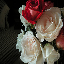

In [ ]:
# Visualize the image

img

In [ ]:
# Converting image to array

x = image.img_to_array(img)
x

array([[[ 6.,  6.,  4.],
        [21., 22., 16.],
        [12., 13.,  8.],
        ...,
        [ 1.,  1.,  0.],
        [ 2.,  2.,  0.],
        [ 2.,  2.,  0.]],

       [[20., 21., 16.],
        [ 7.,  7.,  5.],
        [22., 23., 18.],
        ...,
        [ 0.,  0.,  0.],
        [ 2.,  2.,  0.],
        [ 1.,  1.,  0.]],

       [[16., 17., 12.],
        [20., 21., 16.],
        [11., 12.,  7.],
        ...,
        [ 1.,  1.,  0.],
        [ 1.,  1.,  0.],
        [ 1.,  1.,  0.]],

       ...,

       [[13., 14.,  9.],
        [ 9.,  9.,  9.],
        [ 6.,  6.,  4.],
        ...,
        [ 1.,  1.,  0.],
        [ 2.,  2.,  0.],
        [ 2.,  2.,  0.]],

       [[ 5.,  5.,  3.],
        [ 7.,  7.,  5.],
        [14., 15., 10.],
        ...,
        [23., 23., 21.],
        [ 1.,  1.,  0.],
        [ 1.,  1.,  0.]],

       [[ 2.,  2.,  0.],
        [ 7.,  7.,  5.],
        [ 3.,  3.,  1.],
        ...,
        [22., 22., 20.],
        [ 2.,  2.,  0.],
        [ 2.,  2.,  0.]]

In [ ]:
# Expanding dimensions

x = np.expand_dims(x,axis=0)
x

array([[[[ 6.,  6.,  4.],
         [21., 22., 16.],
         [12., 13.,  8.],
         ...,
         [ 1.,  1.,  0.],
         [ 2.,  2.,  0.],
         [ 2.,  2.,  0.]],

        [[20., 21., 16.],
         [ 7.,  7.,  5.],
         [22., 23., 18.],
         ...,
         [ 0.,  0.,  0.],
         [ 2.,  2.,  0.],
         [ 1.,  1.,  0.]],

        [[16., 17., 12.],
         [20., 21., 16.],
         [11., 12.,  7.],
         ...,
         [ 1.,  1.,  0.],
         [ 1.,  1.,  0.],
         [ 1.,  1.,  0.]],

        ...,

        [[13., 14.,  9.],
         [ 9.,  9.,  9.],
         [ 6.,  6.,  4.],
         ...,
         [ 1.,  1.,  0.],
         [ 2.,  2.,  0.],
         [ 2.,  2.,  0.]],

        [[ 5.,  5.,  3.],
         [ 7.,  7.,  5.],
         [14., 15., 10.],
         ...,
         [23., 23., 21.],
         [ 1.,  1.,  0.],
         [ 1.,  1.,  0.]],

        [[ 2.,  2.,  0.],
         [ 7.,  7.,  5.],
         [ 3.,  3.,  1.],
         ...,
         [22., 22., 20.],
        

In [ ]:
# Predicting animal

model.predict(x)

array([[2.2548706e-04, 8.5826463e-10, 2.6962639e-14, 9.9977452e-01]],
      dtype=float32)

In [ ]:
# For visualizing class index

xtrain.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [ ]:
# Predicting and index matching

op = ['dandelion','daisy','sunflower','rose','tulip']
pred = np.argmax(model.predict(x))
op[pred]

'dandelion'

In [ ]:
# Testing

img = image.load_img('/content/flowers/dandelion/10477378514_9ffbcec4cf_m.jpg',target_size=(64,64))
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x))
op[pred]

'dandelion'